In [2]:
import numpy as np
rgen = np.random.RandomState(1234)
rgen.normal(loc=0.0, scale=0.01, size=1 + 4)

array([ 0.00471435, -0.01190976,  0.01432707, -0.00312652, -0.00720589])

In [12]:
# 準備 X(四個特徵), y(1, -1)
from sklearn import datasets
iris = datasets.load_iris()
X = iris['data'][:100]
y = np.where( iris['target'][:100]==0, -1, 1)
X[:4], y[:4]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2]]),
 array([-1, -1, -1, -1]))

In [3]:
class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta       #學習率
        self.n_iter = n_iter #所有數據要跑幾輪
        self.random_state = random_state #初始亂數種子
    # 匯入資料加上訓練
    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        # 將所有的數據跑過幾輪(epochs)
        for _ in range(self.n_iter):
            errors = 0                   # 每一輪(含所有數據)一開始重置錯誤
            for xi, target in zip(X, y): # 所有數據的每一筆去跟權重進行修正
                update = self.eta * (target - self.predict(xi)) # 計算修正值
                self.w_[1:] += update * xi                      # 根據每一筆資料(X)去修正權重(W)
                self.w_[0] += update                            # 根據每一筆資料(X)去修正權重(W0)
                errors += int(update != 0.0)                    # 計算有這一輪中有幾次預測錯誤
            self.errors_.append(errors)                         # 紀錄每一輪中總共有多少錯誤 
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0] # 就是 W.T * X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1) # 根據 W.T * X 判斷哪一個種類 y(hat)

In [14]:
model = Perceptron() # 初始類別
print(dir(model))    # 檢視類別提供方法

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'eta', 'fit', 'n_iter', 'net_input', 'predict', 'random_state']


In [15]:
model.fit(X, y)     # 呼叫類別的.fit(方法救世匯入資料 加上訓練)

In [16]:
# 檢視權重
model.w_

array([-0.00375655, -0.02811756, -0.09728172,  0.12527031,  0.07065408])

In [20]:
# 檢視每一EPOCHS的訓練有幾筆數據預測錯誤
len(model.errors_)

50

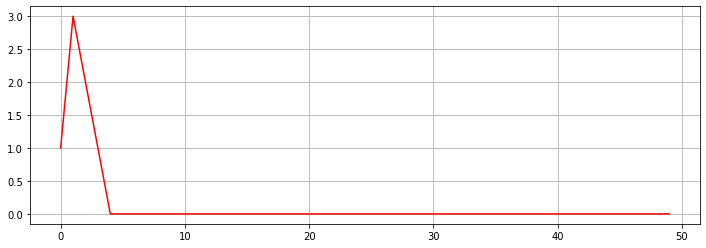

In [22]:
# 針對每一輪的所有一百筆數據預測錯誤筆數畫出來
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(model.errors_, color='red')
plt.grid()
plt.show()